<a href="https://colab.research.google.com/github/utgoyal95/myexperience/blob/master/Fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("fruit.csv", error_bad_lines=False)

/var/folders/sc/m38hzk_90cn6t0363cr74ny40000gn/T/ipykernel_98988/3467032809.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("fruit.csv", error_bad_lines=False)


In [3]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
X = df.drop(['fruit_label', 'fruit_name', 'fruit_subtype'], axis='columns')
y = df['fruit_label']

In [5]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',max_iter=-1),
        'params' : {
            'C': [1,10,20],
            # 'kernel': ['linear', 'rbf',],
    #         #'shrinking':['True', 'False']
        }  
    },

    'kneighbours': {
        'model': KNeighborsClassifier(n_jobs=-1),
        "params": {
            
            'n_neighbors' : [5, 10, 20, 30],
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(n_jobs=-1),
        'params' : {
            'n_estimators': [1,5,10,100],
            'max_depth': [1,2,3,4,5,6],
            'min_samples_leaf': [100,200,300,500,1000],
            'criterion' : ['gini','entropy'], 
        }
    },
    # 'logistic_regression' : {
    #     'model': LogisticRegression(multi_class='auto'),
    #     'params': {
    #         'C': [1,5,10],
    #         'solver':['newton-cg', 'liblinear']
    #     }
    # },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth': [1,2,3,4,5,6],
            'min_samples_leaf': [100,200,300,500,1000]
        }
    }     
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    print(model_name)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, 
                        return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
score_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [8]:
score_df

,model,best_score,best_params
0,svm,0.559091,{'C': 20}
1,kneighbours,0.540909,{'n_neighbors': 5}
2,random_forest,0.339394,"{'criterion': 'gini', 'max_depth': 2, 'min_sam..."
3,naive_bayes_gaussian,0.796970,{}
4,naive_bayes_multinomial,0.575758,{}
5,decision_tree,0.304545,"{'criterion': 'gini', 'max_depth': 1, 'min_sam..."


# Clustering

In [14]:
df2 = df.drop(['fruit_label','fruit_name', 'fruit_subtype'], axis='columns')

df2.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [15]:
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

scaler = Normalizer(norm='l2')
pca = PCA(n_components=2, random_state=1234)
pipe_normalizedscaled_pca = Pipeline([('scaling', scaler), ('pca', pca)])

In [21]:
from sklearn.cluster import KMeans
import plotly.express as px
import seaborn as sns

# Function
def Visualize_Cluster(df, pipeline, n_clusters):
    '''
    Display a scatter plot cluster after transforming the data and using it to fit KMeans Cluster 
    
        Parameters:
                df (pandas.core.frame.DataFrame): Dataframe that will be used in the Pipeline and train the KMeans Cluster
                pipeline (sklearn.pipeline.Pipeline): Transform the Dataframe
                n_clusters (int): Number of clusters that the KMeans Cluster will have
        
        Returns:
                None    
    '''
    
    data = pd.DataFrame(pipeline.fit_transform(df), columns=['x', 'y'])
    
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, verbose=False, random_state=1234)
    clusters = pd.DataFrame(kmeans.fit_predict(data), columns=['Cluster']) 
    
    clusters_data = pd.concat([data, clusters], axis=1)
    
    fig = px.scatter(clusters_data, x='x', y='y', color='Cluster', width=900, height=450, )
    fig.show()

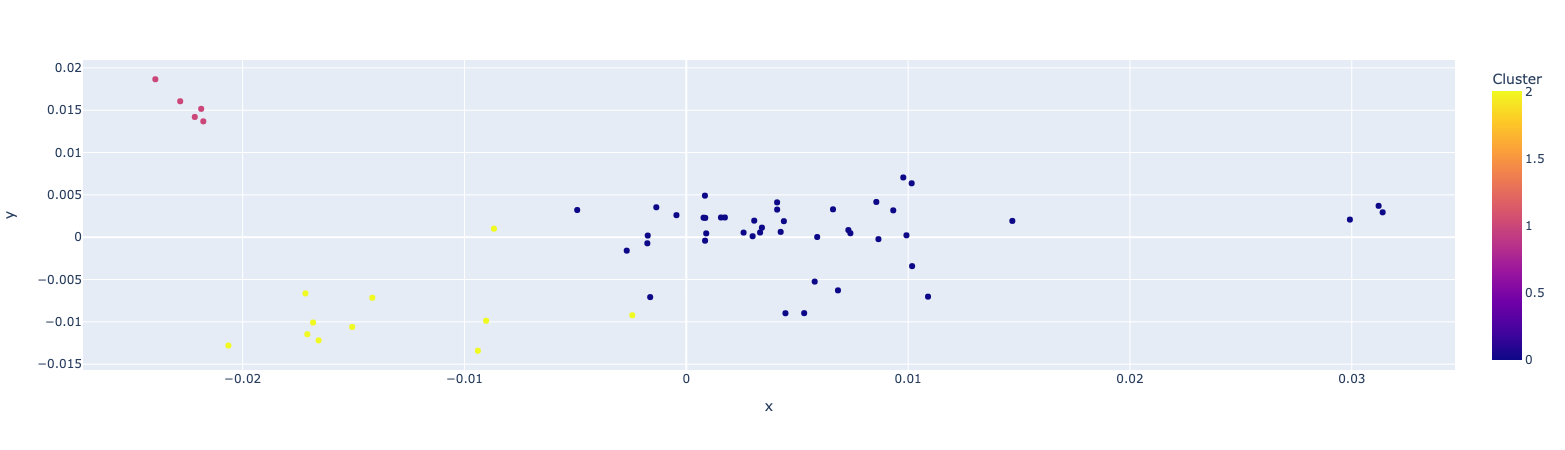

In [22]:
Visualize_Cluster(df2, pipe_normalizedscaled_pca, n_clusters=3)

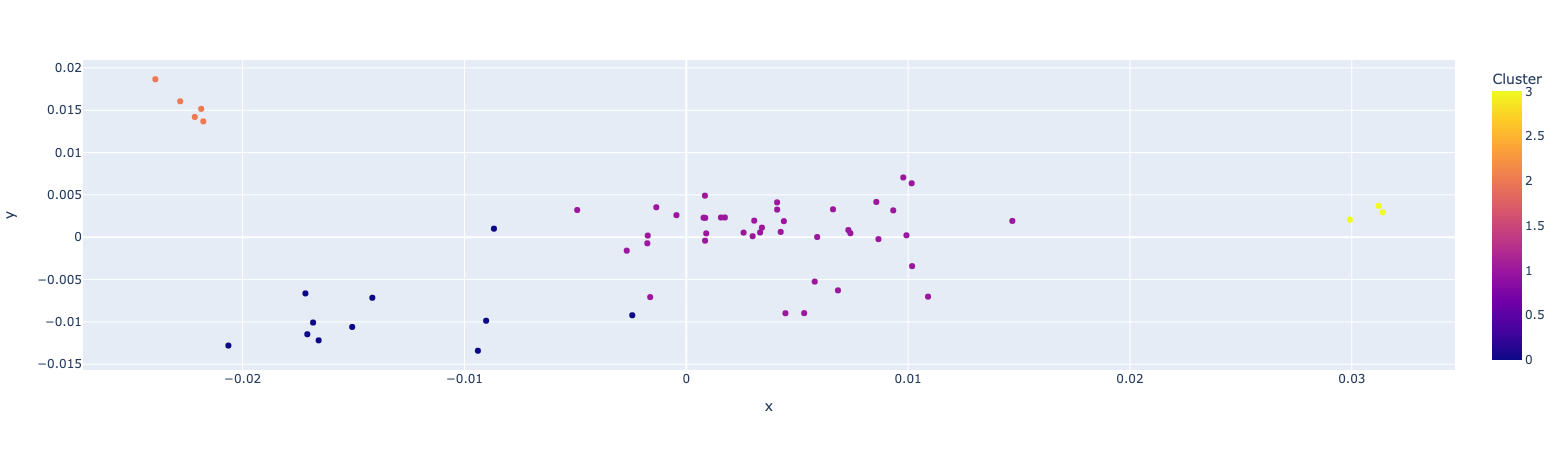

In [24]:
Visualize_Cluster(df2, pipe_normalizedscaled_pca, n_clusters=4)

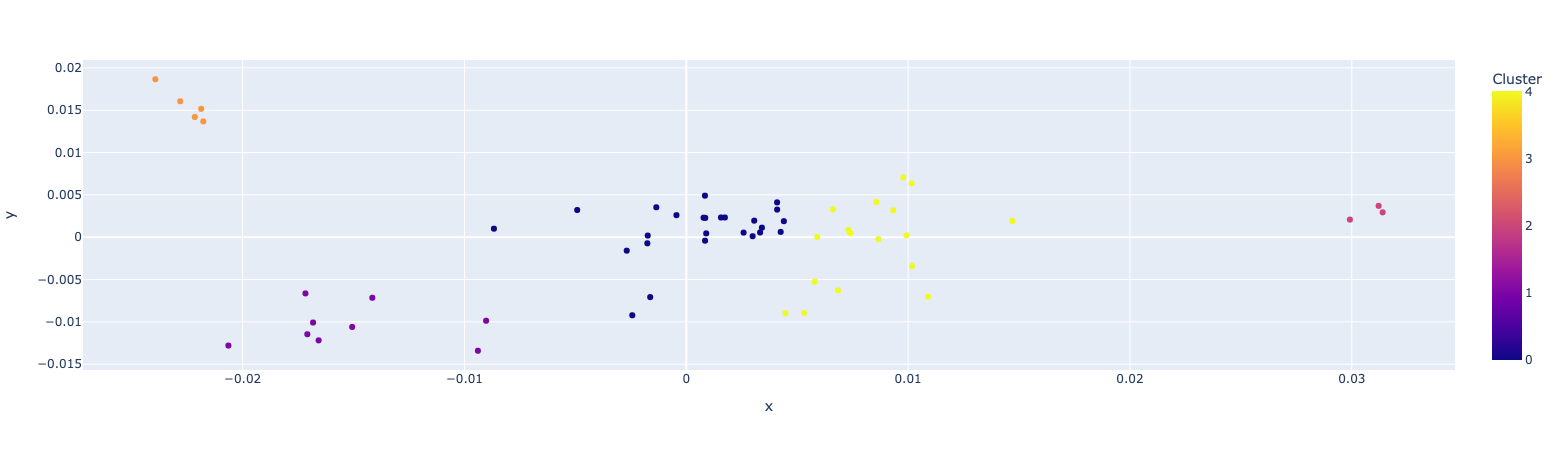

In [23]:
Visualize_Cluster(df2, pipe_normalizedscaled_pca, n_clusters=5)